# Experimentación proyecto Machine Learning

## Algoritmos basados en árboles de desición.

<h3> 1. Extraer data </h3>

- Extraemos la data del repositorio, dónde se encuentra almacenada, y lo almacenamos en nuestro ambiente de trabajo.
- Leemos la data descargada de nuestro ambiente de trabajo, para continuar con los respectivos análisis correspondiente.

In [ ]:
# Extraer data del repositorio
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv

--2022-06-27 13:21:33--  https://archive.ics.uci.edu/ml/machine-learning-databases/00603/in-vehicle-coupon-recommendation.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2163456 (2.1M) [application/x-httpd-php]
Saving to: ‘in-vehicle-coupon-recommendation.csv’

in-vehicle-coupon-r 100%[===================>]   2.06M  4.59MB/s    in 0.4s    

2022-06-27 13:21:34 (4.59 MB/s) - ‘in-vehicle-coupon-recommendation.csv’ saved [2163456/2163456]



In [ ]:
# Cargar la data
import pandas as pd
data = pd.read_csv('/content/in-vehicle-coupon-recommendation.csv')
data.shape

(12684, 26)

### 2. Exploratory Data Analysis.

- Revisar estructura de la data.
- Valores nulos.
- Valores únicos x variable.
- Tipos de variables por defecto.
- Descripción de cada una de las variables.
 

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [ ]:
# Valores nulos por variables
na = data.isna().sum()/len(data)
na[na>0].sort_values(ascending = False)

car                     0.991485
CoffeeHouse             0.017108
Restaurant20To50        0.014901
CarryAway               0.011905
RestaurantLessThan20    0.010249
Bar                     0.008436
dtype: float64

In [ ]:
# Descartamos car por tener más del 99% de valores nulos
data = data.drop('car', axis = 1)
data.shape

(12684, 25)

In [ ]:
# Cantidad de valores únicos por variable.
data.nunique()

destination              3
passanger                4
weather                  3
temperature              3
time                     5
coupon                   5
expiration               2
gender                   2
age                      8
maritalStatus            5
has_children             2
education                6
occupation              25
income                   9
Bar                      5
CoffeeHouse              5
CarryAway                5
RestaurantLessThan20     5
Restaurant20To50         5
toCoupon_GEQ5min         1
toCoupon_GEQ15min        2
toCoupon_GEQ25min        2
direction_same           2
direction_opp            2
Y                        2
dtype: int64

In [ ]:
# Descartamos toCoupon_GEQ5min, ya que solamente contiene un valor distinto.
data = data.drop('toCoupon_GEQ5min', axis = 1)
data.shape

(12684, 24)

In [ ]:
# tipo de variables
# Aunque a excepción de temperature que es discreta, todas las demás son cualitativas.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  Bar                   12577 non-null  object
 15  CoffeeHouse           12467 non-null

#### Descripción de las variables.
- `destination` = Lugar de destino
- `passanger` = Pasajeros con quien va acompañado
- `weather` = Condición climática al conducir
- `temperature` = Temperatura al momento de conducir
- `time` = Hora en la que se le ofrece el cpón al conductor
- `coupon` = Tipo de cupón a canjear
- `expiration` = Caducidad del cupón en 1 día o 2 horas
- `gender` = Género (Masculino o Femenino)
- `age` = Edad
- `maritalStatus` = Estado Civil
- `has_children` = Tiene hijos
- `education` = Grado de Educación
- `occupation` = Ocupación u oficio
- `income` = Renta Anual
- `Bar` = ¿Cuántas veces va a un bar al mes?
- `CoffeeHouse` = ¿Cuántas veces va a una cafetería al mes?
- `CarryAway` = ¿Cuántas veces ordena comida para llevar al mes?
- `RestaurantLessThan20` = ¿Cuántas veces ha ido a un restaurante con un gasto promedio de 20 dólares por persona al mes? 
- `Restaurant20To50` = ¿Cuántas veces ha ido a un restaurante con un gasto promedio entre 20 y 50 dólares por persona al mes?
- `toCoupon_GEQ15min` = ¿Tarda más de 15 minutos en llegar al restaurante/bar para canjear el cupón?
- `toCoupon_GEQ25min` = ¿Tarda más de 25 minutos en llegar al restaurante/bar para canjear el cupón?
- `direction_same` = ¿El restaurante/bar está en la misma dirección que su destino actual?
- `direction_opp` = ¿El restaurante/bar está en diferente dirección a su destino actual? 
- `Y` = Acepta el cupón.

#### 2.1. Preprocesamiento de la data.
- Codificar variables. Se utiliza one hot encoding para todas las variables, ya que en principio todas pueden ser tratadas como cualitativas, ya sean nominales u ordinales.

- No hacemos tratamiento de valores nulos, ya que al convertirlo en dummies, estos son omitidos, o en su defecto pueden convertirse en una clase más.

- Para tener todas las variables con valores entre 0 y 1, también transformamos en dummies la variable temperature

In [ ]:
# Utilizamos one hot encoding para codificar las variables.
data['temperature'] = data['temperature'].astype(str)
data = pd.get_dummies(data) # drop_first = True
data.head()

,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,...,RestaurantLessThan20_1~3,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never
0,1,0,0,0,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,0,0
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,1,0,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
4,1,1,0,0,1,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


## Dividir la data en train y test.
- Separamos en un dataset todas las variables X y en otro arreglo la variable y.
- Dividimos tanto X como y en dos datasets: train y test. Para el test consideramos el 20% de la data, además nos aseguramos que la distribución de las variables X e y sean lo más parecidas en ambos datasets (shuffle-stratify) y seteamos un punto aleatorio de inicio.

In [ ]:
# Dividir en X e y
X = data.drop('Y', axis = 1)
y = data[['Y']].copy()
print(X.shape, y.shape)

(12684, 110) (12684, 1)


In [ ]:
# Dividir en train y test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 33, shuffle = True, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10147, 110) (2537, 110) (10147, 1) (2537, 1)


## Entrenamiento.
En esta etapa probaremos algoritmos basados en Árboles de clasificación, entre los cuales se tiene:
- Desición Trees Clasification.
- Random Forest.
- XgBoost.
- LightGBM.
- CatBoost


In [ ]:
# Data en y balanceada.
data.Y.value_counts()/len(data)*100

1    56.843267
0    43.156733
Name: Y, dtype: float64

In [ ]:
# Performance del modelo
def performance_model(X, y, model):
  y_pred = model.predict(X)
  y_prob = model.predict_proba(X)[:,1]
  auc = roc_auc_score(y, y_prob)
  recall = recall_score(y, y_pred, pos_label=1)
  f1 = f1_score(y, y_pred, pos_label = 1)

  print('-'*55)
  print('Métricas de rendimiento')
  print('-'*55)
  print('\n', classification_report(y, y_pred))
  print(f'Área bajo la curva = {auc}\n\nMatriz de confusión')
  print(confusion_matrix(y, y_pred))

  return y_prob, auc, recall, f1

### Desición Tree Classifier.
- El modelo base, genera overfiting. (AUC train = 0.99 y auc en test 0.68).
- Ajustamos hiperparámetros mediante RandomSearch y greadsearch, además utilizamos Cross Validation.
- Reentrenamos modelo con mejores parámetros.
- Graficamos curva ROC.
- Graficamos y encontramos variables importantes.

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import *

In [ ]:
#Entrenamos el árbol de clasificación - Modelo base.
model_dtc_base = DecisionTreeClassifier()
model_dtc_base.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
print('Exactitud del modelo inicial en entrenamiento:', model_dtc_base.score(X_train, y_train))
print('Exactitud del modelo inicial en validación:', model_dtc_base.score(X_test, y_test))
print()

print('AUC del modelo inicial en entrenamiento:', roc_auc_score(y_train, model_dtc_base.predict_proba(X_train)[:,1]))
print('AUC del modelo inicial en validación:',roc_auc_score(y_test, model_dtc_base.predict_proba(X_test)[:,1]))

Exactitud del modelo inicial en entrenamiento: 0.9984231792648073
Exactitud del modelo inicial en validación: 0.6823019314150571

AUC del modelo inicial en entrenamiento: 0.9999949323131235
AUC del modelo inicial en validación: 0.677889980303865


In [ ]:
# Rendimiento del modelo en data de entrenamiento
model_dtc_base_ptrain = performance_model(X_train, y_train, model_dtc_base)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4379
           1       1.00      1.00      1.00      5768

    accuracy                           1.00     10147
   macro avg       1.00      1.00      1.00     10147
weighted avg       1.00      1.00      1.00     10147

Área bajo la curva = 0.9999949323131235

Matriz de confusión
[[4379    0]
 [  16 5752]]


In [ ]:
# Rendimiento del modelo en data de testeo
p_model_dtc_base_ptest = performance_model(X_test, y_test, model_dtc_base)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.63      0.65      0.64      1095
           1       0.73      0.71      0.72      1442

    accuracy                           0.68      2537
   macro avg       0.68      0.68      0.68      2537
weighted avg       0.68      0.68      0.68      2537

Área bajo la curva = 0.677889980303865

Matriz de confusión
[[ 711  384]
 [ 422 1020]]


Ajustamos hiperparámetros para mejorar el rendimiento del modelo y controlar el overfitting. Dentro de los principales parámetros que tunearemos están:
- ``max_features`` = Número de características a considerar al buscar la mejor división.
- ``ccp_alpha`` = Parámetro de complejidad utilizado para la poda de complejidad de costo mínimo. 
- ``max_depth`` = Profundidad máxima del árbol.
- ``criterion`` = Función para medir la calidad de una división. Los criterios admitidos son "gini" para la impureza de Gini,  "log_loss" y "entropía".
- `min_samples_leaf` = Numero mínimo de muestras que deben quedar en cada hoja del árbol

In [ ]:
from pprint import pprint
import numpy as np

max_features = ['sqrt', 'log2'] + [int(x) for x in np.linspace(start = 20, stop = 100, num = 10)]
max_depth = [int(x) for x in np.linspace(1, 50, num = 11)] + [None]
criterion = ['gini', 'entropy']
min_samples_leaf = [1, 2, 4]
ccp_alpha = [0.1, .01, .001]

random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criterion,
               'min_samples_leaf': min_samples_leaf,
               'ccp_alpha':ccp_alpha}

print('Los valores a probar en la búsqueda aleatoria son:')
pprint(random_grid)

print()
print('Si se probara todas las combinaciones se requeriría entrenar', 
      len(random_grid['max_features']) *
      len(random_grid['max_depth']) *
      len(random_grid['criterion']) *
      len(random_grid['min_samples_leaf'])*
      len(random_grid['ccp_alpha']),
      'modelos'
      )

Los valores a probar en la búsqueda aleatoria son:
{'ccp_alpha': [0.1, 0.01, 0.001],
 'criterion': ['gini', 'entropy'],
 'max_depth': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None],
 'max_features': ['sqrt', 'log2', 20, 28, 37, 46, 55, 64, 73, 82, 91, 100],
 'min_samples_leaf': [1, 2, 4]}

Si se probara todas las combinaciones se requeriría entrenar 2592 modelos


In [ ]:
# Encontraremos los mejores parámetros utilizando el 10% de las combinaciones posibles.
n_iter = int(2592*0.1)
n_iter

259

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

model_dtc_opt = DecisionTreeClassifier()
model_dtc_opt = RandomizedSearchCV(estimator = model_dtc_opt, 
                               param_distributions = random_grid, 
                               n_iter = n_iter, 
                               cv = 10,          # Validación cruzada 10-fold
                               verbose=2, 
                               random_state=0, 
                               n_jobs = -1      # Paralelizar en todos los cores disponibles
                               )
model_dtc_opt.fit(X_train, y_train)

Fitting 10 folds for each of 259 candidates, totalling 2590 fits
CPU times: user 6.73 s, sys: 547 ms, total: 7.27 s
Wall time: 2min 28s


In [ ]:
# Recuperamos los mejores hiperprámetros del modelo
model_dtc_opt_best = model_dtc_opt.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(model_dtc_opt.best_params_)
print()

print('Exactitud luego de búsqueda aleatoria en entrenamiento:', model_dtc_opt_best.score(X_train, y_train))
print('Exactitud luego de búsqueda aleatoria en validación:', model_dtc_opt_best.score(X_test, y_test))
print()

print('AUC luego de búsqueda aleatoria en entrenamiento:', roc_auc_score(y_train, model_dtc_opt_best.predict_proba(X_train)[:,1]))
print('AUC luego de búsqueda aleatoria en validación:',roc_auc_score(y_test, model_dtc_opt_best.predict_proba(X_test)[:,1]))

Los hiperparámetros del mejor modelo son:
{'ccp_alpha': 0.001,
 'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 73,
 'min_samples_leaf': 1}

Exactitud luego de búsqueda aleatoria en entrenamiento: 0.7192273578397556
Exactitud luego de búsqueda aleatoria en validación: 0.7043752463539614

AUC luego de búsqueda aleatoria en entrenamiento: 0.767910769278035
AUC luego de búsqueda aleatoria en validación: 0.7544243472092919


In [ ]:
# Utilizzamos los mejores parámetros encontrados anteriormente, para configurar valores cercanos y utilizarlos en greadsearch.
ccp_alpha = [0.09,0.001, 0.002]
max_depth = [4,5,6,7,8,9,10,25,30,40]
max_features = [60,70,73,80]
min_samples_leaf = [1,2,3,4]

search_grid = {'ccp_alpha': ccp_alpha,
               'max_depth': max_depth,
               'min_samples_leaf': min_samples_leaf,
               'max_features':max_features}

print('Los valores a probar en la búsqueda por grilla son:')
pprint(search_grid)

Los valores a probar en la búsqueda por grilla son:
{'ccp_alpha': [0.09, 0.001, 0.002],
 'max_depth': [4, 5, 6, 7, 8, 9, 10, 25, 30, 40],
 'max_features': [60, 70, 73, 80],
 'min_samples_leaf': [1, 2, 3, 4]}


In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

model_dtc_opt = DecisionTreeClassifier(criterion = 'entropy')
model_dtc_opt = GridSearchCV(estimator = model_dtc_opt, 
                        param_grid = search_grid, 
                        cv = 5,          # Validación cruzada 3-fold
                        verbose=2, 
                        n_jobs = -1      # Paralelizar en todos los cores disponibles
                        )
model_dtc_opt.fit(X_train, y_train)

Fitting 5 folds for each of 480 candidates, totalling 2400 fits
CPU times: user 5.69 s, sys: 493 ms, total: 6.19 s
Wall time: 1min 52s


In [ ]:
model_dtc_opt_best = model_dtc_opt.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(model_dtc_opt.best_params_)
print()

print('Exactitud luego de búsqueda en grilla en entrenamiento:', model_dtc_opt_best.score(X_train, y_train))
print('Exactitud luego de búsqueda en grilla en validación:', model_dtc_opt_best.score(X_test, y_test))
print()

print('AUC luego de búsqueda aleatoria en entrenamiento:', roc_auc_score(y_train, model_dtc_opt_best.predict_proba(X_train)[:,1]))
print('AUC luego de búsqueda aleatoria en validación:',roc_auc_score(y_test, model_dtc_opt_best.predict_proba(X_test)[:,1]))

Los hiperparámetros del mejor modelo son:
{'ccp_alpha': 0.001, 'max_depth': 10, 'max_features': 80, 'min_samples_leaf': 4}

Exactitud luego de búsqueda en grilla en entrenamiento: 0.7171577806248152
Exactitud luego de búsqueda en grilla en validación: 0.7094994087504927

AUC luego de búsqueda aleatoria en entrenamiento: 0.772726180367211
AUC luego de búsqueda aleatoria en validación: 0.7505063363289192


In [ ]:
# Reentrenamiento del modelo con los mejores parámetros.
#Entrenamos el árbol de clasificación - Modelo base.
model_dtc_opt = DecisionTreeClassifier(ccp_alpha = 0.001, 
                                        max_depth = 10, 
                                        max_features= 80, 
                                        min_samples_leaf= 4)

model_dtc_opt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=10, max_features=80,
                       min_samples_leaf=4)

In [ ]:
# Rendimiento del modelo en data de entrenamiento
model_dtc_base_ptrain = performance_model(X_train, y_train, model_dtc_opt)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.70      0.56      0.62      4379
           1       0.71      0.82      0.76      5768

    accuracy                           0.70     10147
   macro avg       0.70      0.69      0.69     10147
weighted avg       0.70      0.70      0.70     10147

Área bajo la curva = 0.7486673171253925

Matriz de confusión
[[2436 1943]
 [1061 4707]]


In [ ]:
# Rendimiento del modelo en data de validación
model_dtc_base_ptest = performance_model(X_test, y_test, model_dtc_opt)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.69      0.55      0.61      1095
           1       0.70      0.81      0.75      1442

    accuracy                           0.70      2537
   macro avg       0.70      0.68      0.68      2537
weighted avg       0.70      0.70      0.69      2537

Área bajo la curva = 0.7388276683196221

Matriz de confusión
[[ 604  491]
 [ 270 1172]]


In [ ]:
# Guardar modelo entrenado.
import pickle
with open('model_dtc_opt.pkl', 'wb') as f:
  pickle.dump(model_dtc_opt, f)

### Visualización de la curva ROC

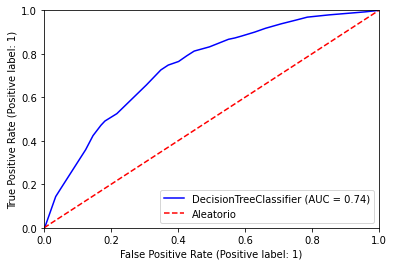

In [ ]:
import matplotlib.pyplot as plt
y_pred_val = model_dtc_opt.predict_proba(X_test)[:,1]
auc_roc = roc_auc_score(y_test, y_pred_val)
#print('AUC =', auc_roc)
#fig = plt.figure(figsize=(12,4))
#fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_dtc_opt, X_test, y_test, color = 'blue')
plt.plot([0,1], [0,1], linestyle='--', label = 'Aleatorio', color = 'red')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()

### Importancia de variables

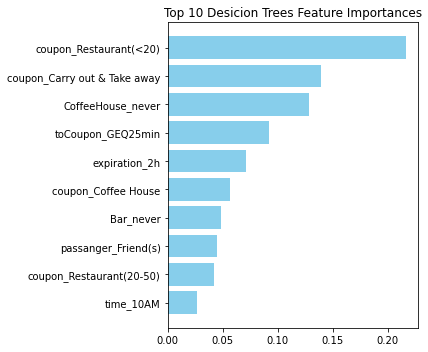

In [ ]:
feature_names = X_test.columns#.tolist()
tree_feature_importances = model_dtc_opt.feature_importances_
sorted_idx = tree_feature_importances.argsort()

n_import = 10
y_ticks = np.arange(0, len(feature_names))[-n_import:]
fig, ax = plt.subplots(figsize = (6,5))
ax.barh(y_ticks[-n_import:], tree_feature_importances[sorted_idx][-n_import:], color = 'skyblue')
ax.set_yticklabels(feature_names[sorted_idx][-n_import:])
ax.set_yticks(y_ticks)
ax.set_title("Top 10 Desicion Trees Feature Importances")
fig.tight_layout()
plt.show()

In [ ]:
# Utilizamos librería shap
#https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20XGBoost.html

In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 6.9 MB/s 


In [ ]:
import shap
import matplotlib.pylab as pl
# print the JS visualization code to the notebook
shap.initjs()

In [ ]:
# Damos formato a la data.
X1 = X.merge(y, left_index = True, right_index = True, how = 'inner')
X1.rename(columns = {'Y':'target'})
X1.head()

,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),...,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,Y
0,1,0,0,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,1,0,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0
2,1,1,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
3,1,1,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [ ]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model_dtc_opt)
shap_values = explainer.shap_values(X1)

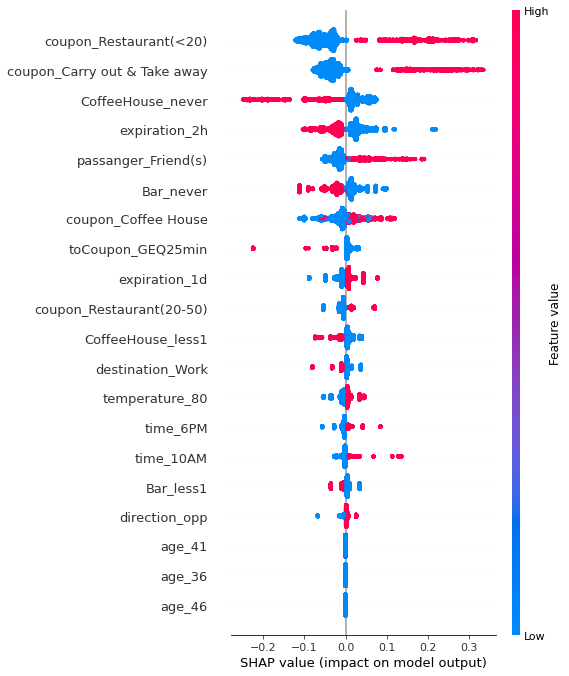

In [ ]:
shap.summary_plot(shap_values[1], X1)

---------------

### Random Forest
- El modelo base, genera overfiting. (AUC train = 0.99 y auc en test 0.68).
- Ajustamos hiperparámetros mediante RandomSearch y greadsearch, además utilizamos Cross Validation.
- Reentrenamos modelo con mejores parámetros.
- Graficamos curva ROC.
- Graficamos y encontramos variables importantes.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *

In [ ]:
#Entrenamos un modelo base
model_rf_base = RandomForestClassifier(oob_score = True)
model_rf_base.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(oob_score=True)

In [ ]:
print('Exactitud del modelo inicial en entrenamiento:', model_rf_base.score(X_train, y_train))
print('Exactitud del modelo inicial en entrenamiento (Out of Bag):', model_rf_base.oob_score_)
print('Exactitud del modelo inicial en validación:', model_rf_base.score(X_test, y_test))
print()

print('AUC del modelo inicial en entrenamiento:', roc_auc_score(y_train, model_rf_base.predict_proba(X_train)[:,1]))
print('AUC del modelo inicial en validación:',roc_auc_score(y_test, model_rf_base.predict_proba(X_test)[:,1]))

Exactitud del modelo inicial en entrenamiento: 0.9984231792648073
Exactitud del modelo inicial en entrenamiento (Out of Bag): 0.7505666699517098
Exactitud del modelo inicial en validación: 0.7646826960977533

AUC del modelo inicial en entrenamiento: 0.9999949323131235
AUC del modelo inicial en validación: 0.8268383586976485


In [ ]:
# Rendimiento del modelo en data de entrenamiento
model_rf_base_ptrain = performance_model(X_train, y_train, model_rf_base)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4379
           1       1.00      1.00      1.00      5768

    accuracy                           1.00     10147
   macro avg       1.00      1.00      1.00     10147
weighted avg       1.00      1.00      1.00     10147

Área bajo la curva = 0.9999949323131235

Matriz de confusión
[[4368   11]
 [   5 5763]]


In [ ]:
# Rendimiento del modelo en data de testeo
p_model_rf_base_ptest = performance_model(X_test, y_test, model_rf_base)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.75      0.68      0.71      1095
           1       0.77      0.83      0.80      1442

    accuracy                           0.76      2537
   macro avg       0.76      0.75      0.76      2537
weighted avg       0.76      0.76      0.76      2537

Área bajo la curva = 0.8268383586976485

Matriz de confusión
[[ 748  347]
 [ 250 1192]]


Ajustamos hiperparámetros para mejorar el rendimiento del modelo y controlar el overfitting. Dentro de los principales parámetros que tunearemos están:

- `n_estimators` -- el número de modelos base (árboles) a entrenar
- `max_features` -- el número de características a considerar en cada partición de los árboles
- `max_depth` -- la profundidad máxima de los árboles
- `min_samples_leaf` -- el numero mínimo de muestras que deben quedar en cada hoja del árbol

Para identificar los mejores valores de los hiperparámetros usaremos primero búsqueda aleatoria y luego búsqueda en grilla.

In [ ]:
# Tueneo de hiperparámetros utilizando random search
from pprint import pprint
import numpy as np

max_features = ['sqrt', 'log2'] + [int(x) for x in np.linspace(start = 20, stop = 100, num = 10)]
max_depth = [int(x) for x in np.linspace(1, 50, num = 11)] + [None]
criterion = ['gini', 'entropy']
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

random_grid = {'max_features': max_features,
               'max_depth': max_depth,
               'criterion': criterion,
               'n_estimators': n_estimators}

print('Los valores a probar en la búsqueda aleatoria son:')
pprint(random_grid)

print()
print('Si se probara todas las combinaciones se requeriría entrenar', 
      len(random_grid['max_features']) *
      len(random_grid['max_depth']) *
      len(random_grid['criterion']) *
      len(random_grid['n_estimators']),
      'modelos'
      )

Los valores a probar en la búsqueda aleatoria son:
{'criterion': ['gini', 'entropy'],
 'max_depth': [1, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, None],
 'max_features': ['sqrt', 'log2', 20, 28, 37, 46, 55, 64, 73, 82, 91, 100],
 'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000]}

Si se probara todas las combinaciones se requeriría entrenar 2880 modelos


In [ ]:
# Encontraremos los mejores parámetros utilizando el 10% de las combinaciones posibles.
# Por temas de capacidad de la máquina solamente se utiliza el 1% de combinaciones.
n_iter = int(2880 *0.01)
n_iter

28

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV

model_rf_opt = RandomForestClassifier(oob_score = True)
model_rf_opt = RandomizedSearchCV(estimator = model_rf_opt, 
                               param_distributions = random_grid, 
                               n_iter = n_iter, 
                               cv = 3,          # Validación cruzada 10-fold
                               verbose=2, 
                               random_state=0, 
                               n_jobs = -1      # Paralelizar en todos los cores disponibles
                               )
model_rf_opt.fit(X_train, y_train)

Fitting 3 folds for each of 28 candidates, totalling 84 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


CPU times: user 51.8 s, sys: 789 ms, total: 52.6 s
Wall time: 19min 4s


In [ ]:
# Recuperamos los mejores hiperprámetros del modelo
model_rf_opt_best = model_rf_opt.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(model_rf_opt.best_params_)
print()

print('Exactitud luego de búsqueda aleatoria en entrenamiento:', model_rf_opt_best.score(X_train, y_train))
print('Exactitud luego de búsqueda aleatoria en entrenamiento (Out of Bag):', model_rf_opt_best.oob_score_)
print('Exactitud luego de búsqueda aleatoria en validación:', model_rf_opt_best.score(X_test, y_test))
print()

print('AUC luego de búsqueda aleatoria en entrenamiento:', roc_auc_score(y_train, model_rf_opt_best.predict_proba(X_train)[:,1]))
print('AUC luego de búsqueda aleatoria en validación:',roc_auc_score(y_test, model_rf_opt_best.predict_proba(X_test)[:,1]))

Los hiperparámetros del mejor modelo son:
{'criterion': 'gini', 'max_depth': 30, 'max_features': 100, 'n_estimators': 644}

Exactitud luego de búsqueda aleatoria en entrenamiento: 0.9984231792648073
Exactitud luego de búsqueda aleatoria en entrenamiento (Out of Bag): 0.7653493643441411
Exactitud luego de búsqueda aleatoria en validación: 0.7607410327158061

AUC luego de búsqueda aleatoria en entrenamiento: 0.9999949323131235
AUC luego de búsqueda aleatoria en validación: 0.8311829080614824


In [ ]:
# Utilizzamos los mejores parámetros encontrados anteriormente, para configurar valores cercanos y utilizarlos en greadsearch.
max_depth = [10,20, 30,40]
max_features = [70,80,100]
n_estimators = [200,600,700]

search_grid = {'max_depth': max_depth,
               'max_features':max_features,
               'n_estimators': n_estimators}

print('Los valores a probar en la búsqueda por grilla son:')
pprint(search_grid)

Los valores a probar en la búsqueda por grilla son:
{'max_depth': [10, 20, 30, 40],
 'max_features': [70, 80, 100],
 'n_estimators': [200, 600, 700]}


In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

model_rf_opt =  RandomForestClassifier(oob_score = True, criterion = 'entropy')
model_rf_opt = GridSearchCV(estimator = model_rf_opt, 
                        param_grid = search_grid, 
                        cv = 3,          # Validación cruzada 3-fold
                        verbose=2, 
                        n_jobs = -1      # Paralelizar en todos los cores disponibles
                        )
model_rf_opt.fit(X_train, y_train)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:926: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


CPU times: user 18.2 s, sys: 657 ms, total: 18.8 s
Wall time: 29min 36s


In [ ]:
model_rf_opt_best = model_rf_opt.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(model_rf_opt.best_params_)
print()

print('Exactitud luego de búsqueda en grilla en entrenamiento:', model_rf_opt_best.score(X_train, y_train))
print('Exactitud luego de búsqueda aleatoria en entrenamiento (Out of Bag):', model_rf_opt_best.oob_score_)
print('Exactitud luego de búsqueda en grilla en validación:', model_rf_opt_best.score(X_test, y_test))
print()

print('AUC luego de búsqueda aleatoria en entrenamiento:', roc_auc_score(y_train, model_rf_opt_best.predict_proba(X_train)[:,1]))
print('AUC luego de búsqueda aleatoria en validación:',roc_auc_score(y_test, model_rf_opt_best.predict_proba(X_test)[:,1]))

Los hiperparámetros del mejor modelo son:
{'max_depth': 20, 'max_features': 80, 'n_estimators': 200}

Exactitud luego de búsqueda en grilla en entrenamiento: 0.9982260766729083
Exactitud luego de búsqueda aleatoria en entrenamiento (Out of Bag): 0.7601261456588154
Exactitud luego de búsqueda en grilla en validación: 0.7619235317303902

AUC luego de búsqueda aleatoria en entrenamiento: 0.9999893895306022
AUC luego de búsqueda aleatoria en validación: 0.8296141837503721


In [ ]:
# Hay bastante overfiting por lo que reentrenamos el modelo com max_depth más pequeño.
# Reentrenamiento del modelo con los mejores parámetros.
#Entrenamos el árbol de clasificación - Modelo base.
model_rf_opt = RandomForestClassifier(criterion='gini', max_depth=10, max_features=80,
                       n_estimators=100, oob_score=True)

model_rf_opt.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


RandomForestClassifier(max_depth=10, max_features=80, oob_score=True)

In [ ]:
print('Exactitud luego de búsqueda en grilla en entrenamiento:', model_rf_opt.score(X_train, y_train))
print('Exactitud luego de búsqueda aleatoria en entrenamiento (Out of Bag):', model_rf_opt.oob_score_)
print('Exactitud luego de búsqueda en grilla en validación:', model_rf_opt.score(X_test, y_test))
print()

print('AUC luego de búsqueda aleatoria en entrenamiento:', roc_auc_score(y_train, model_rf_opt.predict_proba(X_train)[:,1]))
print('AUC luego de búsqueda aleatoria en validación:',roc_auc_score(y_test, model_rf_opt.predict_proba(X_test)[:,1]))

Exactitud luego de búsqueda en grilla en entrenamiento: 0.8400512466738937
Exactitud luego de búsqueda aleatoria en entrenamiento (Out of Bag): 0.7392332709175126
Exactitud luego de búsqueda en grilla en validación: 0.7402443831296808

AUC luego de búsqueda aleatoria en entrenamiento: 0.9283904567221125
AUC luego de búsqueda aleatoria en validación: 0.8020845603835364


In [ ]:

# Rendimiento del modelo en data de entrenamiento
model_rf_base_ptrain = performance_model(X_train, y_train, model_rf_opt)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.85      0.76      0.80      4379
           1       0.83      0.90      0.86      5768

    accuracy                           0.84     10147
   macro avg       0.84      0.83      0.83     10147
weighted avg       0.84      0.84      0.84     10147

Área bajo la curva = 0.9283904567221125

Matriz de confusión
[[3344 1035]
 [ 588 5180]]


In [ ]:
# Rendimiento del modelo en data de validación
model_rf_base_ptest = performance_model(X_test, y_test, model_rf_opt)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.73      0.64      0.68      1095
           1       0.75      0.82      0.78      1442

    accuracy                           0.74      2537
   macro avg       0.74      0.73      0.73      2537
weighted avg       0.74      0.74      0.74      2537

Área bajo la curva = 0.8020845603835364

Matriz de confusión
[[ 700  395]
 [ 264 1178]]


In [ ]:
# Guardar modelo entrenado.
import pickle
with open('model_rf_opt.pkl', 'wb') as f:
  pickle.dump(model_rf_opt, f)

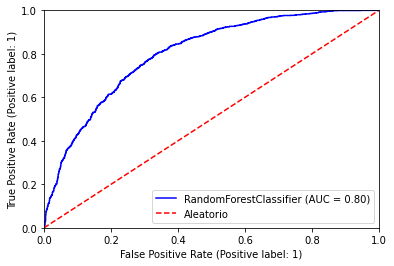

In [ ]:
import matplotlib.pyplot as plt
y_pred_val = model_rf_opt.predict_proba(X_test)[:,1]
auc_roc = roc_auc_score(y_test, y_pred_val)
#print('AUC =', auc_roc)
#fig = plt.figure(figsize=(12,4))
#fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_rf_opt, X_test, y_test, color = 'blue')
plt.plot([0,1], [0,1], linestyle='--', label = 'Aleatorio', color = 'red')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()

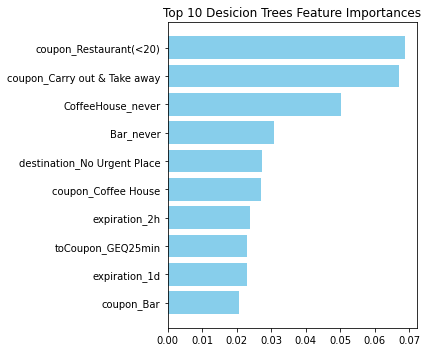

In [ ]:
feature_names = X_test.columns#.tolist()
tree_feature_importances = model_rf_opt.feature_importances_
sorted_idx = tree_feature_importances.argsort()

n_import = 10
y_ticks = np.arange(0, len(feature_names))[-n_import:]
fig, ax = plt.subplots(figsize = (6,5))
ax.barh(y_ticks[-n_import:], tree_feature_importances[sorted_idx][-n_import:], color = 'skyblue')
ax.set_yticklabels(feature_names[sorted_idx][-n_import:])
ax.set_yticks(y_ticks)
ax.set_title("Top 10 Desicion Trees Feature Importances")
fig.tight_layout()
plt.show()

In [ ]:
!pip install shap
import shap
import matplotlib.pylab as pl
# print the JS visualization code to the notebook
shap.initjs()

# Damos formato a la data.
X1 = X.merge(y, left_index = True, right_index = True, how = 'inner')
X1.rename(columns = {'Y':'target'})
X1.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 569 kB 13.8 MB/s 


,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_Home,destination_No Urgent Place,destination_Work,passanger_Alone,passanger_Friend(s),...,RestaurantLessThan20_4~8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1~3,Restaurant20To50_4~8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,Y
0,1,0,0,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,1,0,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0
2,1,1,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
3,1,1,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0


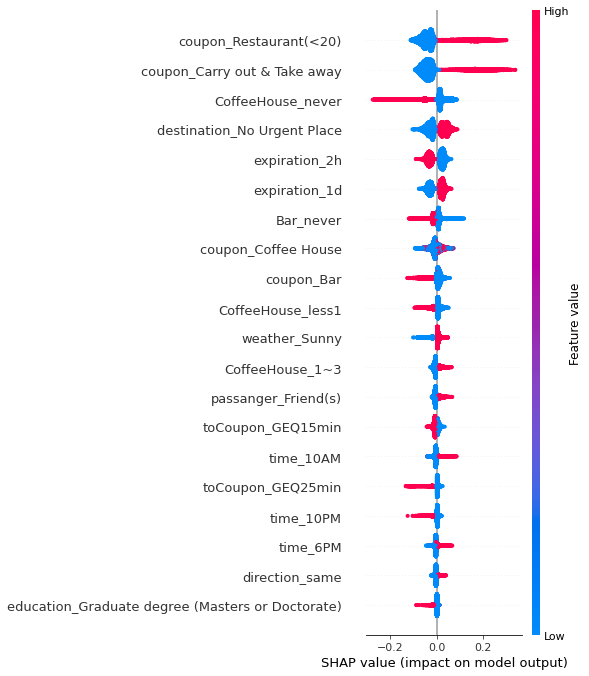

In [ ]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model_rf_opt)
shap_values = explainer.shap_values(X1)
shap.summary_plot(shap_values[1], X1)

------------

### XGBoost

In [ ]:
import re
nc = []
for columns in X_train.columns:
  nc.append(re.sub('[^a-zA-Z0-9]', '_', columns).strip())

In [ ]:
X_train.columns = nc
X_test.columns = nc

In [ ]:
# Entrenar modelo simple
from xgboost import XGBClassifier 

model_xgb_base = XGBClassifier()
model_xgb_base.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier()

In [ ]:
print('Exactitud del modelo inicial en entrenamiento:', model_xgb_base.score(X_train, y_train))
print('Exactitud del modelo inicial en validación:', model_xgb_base.score(X_test, y_test))
print()

print('AUC del modelo inicial en entrenamiento:', roc_auc_score(y_train, model_xgb_base.predict_proba(X_train)[:,1]))
print('AUC del modelo inicial en validación:',roc_auc_score(y_test, model_xgb_base.predict_proba(X_test)[:,1]))

Exactitud del modelo inicial en entrenamiento: 0.7313491672415492
Exactitud del modelo inicial en validación: 0.7130469057942451

AUC del modelo inicial en entrenamiento: 0.80147586086539
AUC del modelo inicial en validación: 0.7802158341724773


In [ ]:
# Rendimiento del modelo en data de entrenamiento
model_xgb_base_ptrain = performance_model(X_train, y_train, model_xgb_base)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.72      0.61      0.66      4379
           1       0.74      0.82      0.78      5768

    accuracy                           0.73     10147
   macro avg       0.73      0.72      0.72     10147
weighted avg       0.73      0.73      0.73     10147

Área bajo la curva = 0.80147586086539

Matriz de confusión
[[2689 1690]
 [1036 4732]]


In [ ]:
# Rendimiento del modelo en data de testeo
p_model_xgb_base_ptest = performance_model(X_test, y_test, model_xgb_base)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.70      0.59      0.64      1095
           1       0.72      0.81      0.76      1442

    accuracy                           0.71      2537
   macro avg       0.71      0.70      0.70      2537
weighted avg       0.71      0.71      0.71      2537

Área bajo la curva = 0.7802158341724773

Matriz de confusión
[[ 644  451]
 [ 277 1165]]


Ajustamos hiperparámetros para mejorar el rendimiento del modelo y controlar el overfitting. Dentro de los principales parámetros que tunearemos están:



In [ ]:
# Búsqueda aleatoria de hiperparámetros
from pprint import pprint
import numpy as np

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 5)]
max_features = ['sqrt', 'log2'] + [int(x) for x in np.linspace(start = 20, stop = 100, num = 5)]
max_depth = [int(x) for x in np.linspace(10, 50, num = 5)]
learning_rate = [int(x)/1000 for x in np.linspace(start = 0, stop = 100, num = 5)]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'learning_rate': learning_rate}

print('Los valores a probar en la búsqueda aleatoria son:')
pprint(random_grid)

print()
print('Si se probara todas las combinaciones se requeriría entrenar', 
      len(random_grid['n_estimators']) *
      len(random_grid['max_features']) *
      len(random_grid['max_depth']) *
      len(random_grid['learning_rate']),
      'modelos'
      ) 

Los valores a probar en la búsqueda aleatoria son:
{'learning_rate': [0.0, 0.025, 0.05, 0.075, 0.1],
 'max_depth': [10, 20, 30, 40, 50],
 'max_features': ['sqrt', 'log2', 20, 40, 60, 80, 100],
 'n_estimators': [200, 400, 600, 800, 1000]}

Si se probara todas las combinaciones se requeriría entrenar 875 modelos


In [ ]:
# Encontraremos los mejores parámetros utilizando el 10% de las combinaciones posibles.
n_iter = int(875   *0.01)
n_iter

8

In [ ]:
%%time
from sklearn.model_selection import RandomizedSearchCV
model_xgb_opt = XGBClassifier()
model_xgb_opt = RandomizedSearchCV(estimator = model_xgb_opt, 
                               param_distributions = random_grid, 
                               n_iter = n_iter, 
                               cv = 3,          # Validación cruzada 3-fold
                               verbose=2, 
                               random_state=0, 
                               n_jobs = -1      # Paralelizar en todos los cores disponibles
                               )
model_xgb_opt.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 2min 5s, sys: 852 ms, total: 2min 5s
Wall time: 20min 2s


In [ ]:
# Recuperamos los mejores hiperprámetros del modelo
model_xgb_opt_best = model_xgb_opt.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(model_xgb_opt.best_params_)
print()

print('Exactitud luego de búsqueda aleatoria en entrenamiento:', model_xgb_opt_best.score(X_train, y_train))
print('Exactitud luego de búsqueda aleatoria en validación:', model_xgb_opt_best.score(X_test, y_test))
print()

print('AUC luego de búsqueda aleatoria en entrenamiento:', roc_auc_score(y_train, model_xgb_opt_best.predict_proba(X_train)[:,1]))
print('AUC luego de búsqueda aleatoria en validación:',roc_auc_score(y_test, model_xgb_opt_best.predict_proba(X_test)[:,1]))

Los hiperparámetros del mejor modelo son:
{'learning_rate': 0.1, 'max_depth': 20, 'max_features': 80, 'n_estimators': 800}

Exactitud luego de búsqueda aleatoria en entrenamiento: 0.9984231792648073
Exactitud luego de búsqueda aleatoria en validación: 0.7729601891998423

AUC luego de búsqueda aleatoria en entrenamiento: 0.9999949323131235
AUC luego de búsqueda aleatoria en validación: 0.8433191470496962


In [ ]:
# Utilizamos los mejores parámetros encontrados anteriormente, para configurar valores cercanos y utilizarlos en greadsearch.
max_depth = [5,10,20]
max_features = [70,80]
n_estimators = [600,800]
learning_rate = [0.01,0.1]


search_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'learning_rate': learning_rate}

print('Los valores a probar en la búsqueda por grilla son:')
pprint(search_grid)

Los valores a probar en la búsqueda por grilla son:
{'learning_rate': [0.01, 0.1],
 'max_depth': [5, 10, 20],
 'max_features': [70, 80],
 'n_estimators': [600, 800]}


In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

model_xgb_opt = XGBClassifier()
model_xgb_opt = GridSearchCV(estimator = model_xgb_opt, 
                        param_grid = search_grid, 
                        cv = 3,          # Validación cruzada 3-fold
                        verbose=2, 
                        n_jobs = -1      # Paralelizar en todos los cores disponibles
                        )
model_xgb_opt.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


CPU times: user 1min 45s, sys: 1.55 s, total: 1min 46s
Wall time: 43min 44s


In [ ]:
model_xgb_opt_best = model_xgb_opt.best_estimator_

print('Los hiperparámetros del mejor modelo son:')
pprint(model_xgb_opt.best_params_)
print()

print('Exactitud luego de búsqueda en grilla en entrenamiento:', model_xgb_opt_best.score(X_train, y_train))
print('Exactitud luego de búsqueda en grilla en validación:', model_xgb_opt_best.score(X_test, y_test))
print()

print('AUC luego de búsqueda aleatoria en entrenamiento:', roc_auc_score(y_train, model_xgb_opt_best.predict_proba(X_train)[:,1]))
print('AUC luego de búsqueda aleatoria en validación:',roc_auc_score(y_test, model_xgb_opt_best.predict_proba(X_test)[:,1]))

Los hiperparámetros del mejor modelo son:
{'learning_rate': 0.1, 'max_depth': 20, 'max_features': 70, 'n_estimators': 600}

Exactitud luego de búsqueda en grilla en entrenamiento: 0.9984231792648073
Exactitud luego de búsqueda en grilla en validación: 0.7717776901852582

AUC luego de búsqueda aleatoria en entrenamiento: 0.9999949323131235
AUC luego de búsqueda aleatoria en validación: 0.8430192718129943


In [ ]:
# Reentrenamiento del modelo con los mejores parámetros.
#Entrenamos el árbol de clasificación - Modelo base.
model_xgb_opt = XGBClassifier(max_depth=20, max_features=70, n_estimators=600)

model_xgb_opt.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(max_depth=20, max_features=70, n_estimators=600)

In [ ]:
print('Exactitud luego de búsqueda en grilla en entrenamiento:', model_xgb_opt.score(X_train, y_train))
print('Exactitud luego de búsqueda en grilla en validación:', model_xgb_opt.score(X_test, y_test))
print()

print('AUC luego de búsqueda aleatoria en entrenamiento:', roc_auc_score(y_train, model_xgb_opt.predict_proba(X_train)[:,1]))
print('AUC luego de búsqueda aleatoria en validación:',roc_auc_score(y_test, model_xgb_opt.predict_proba(X_test)[:,1]))

Exactitud luego de búsqueda en grilla en entrenamiento: 0.9984231792648073
Exactitud luego de búsqueda en grilla en validación: 0.7717776901852582

AUC luego de búsqueda aleatoria en entrenamiento: 0.9999949323131235
AUC luego de búsqueda aleatoria en validación: 0.8430192718129943


In [ ]:
# Rendimiento del modelo en data de entrenamiento
model_xgb_base_ptrain = performance_model(X_train, y_train, model_xgb_opt)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4379
           1       1.00      1.00      1.00      5768

    accuracy                           1.00     10147
   macro avg       1.00      1.00      1.00     10147
weighted avg       1.00      1.00      1.00     10147

Área bajo la curva = 0.9999949323131235

Matriz de confusión
[[4370    9]
 [   7 5761]]


In [ ]:
# Rendimiento del modelo en data de validación
model_xgb_base_ptest = performance_model(X_test, y_test, model_xgb_opt)

-------------------------------------------------------
Métricas de rendimiento
-------------------------------------------------------

               precision    recall  f1-score   support

           0       0.75      0.71      0.73      1095
           1       0.79      0.82      0.80      1442

    accuracy                           0.77      2537
   macro avg       0.77      0.76      0.77      2537
weighted avg       0.77      0.77      0.77      2537

Área bajo la curva = 0.8430192718129943

Matriz de confusión
[[ 772  323]
 [ 256 1186]]


In [ ]:
# Guardar modelo entrenado.
import pickle
with open('model_xgb_opt.pkl', 'wb') as f:
  pickle.dump(model_xgb_opt, f)

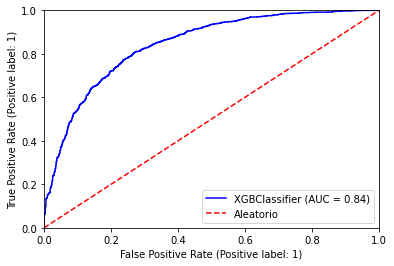

In [ ]:
# Curva AUC
import matplotlib.pyplot as plt
y_pred_val = model_xgb_opt.predict_proba(X_test)[:,1]
auc_roc = roc_auc_score(y_test, y_pred_val)
#print('AUC =', auc_roc)
#fig = plt.figure(figsize=(12,4))
#fig, ax = plt.subplots(figsize = (12,8))
RocCurveDisplay.from_estimator(model_xgb_opt, X_test, y_test, color = 'blue')
plt.plot([0,1], [0,1], linestyle='--', label = 'Aleatorio', color = 'red')
plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.show()

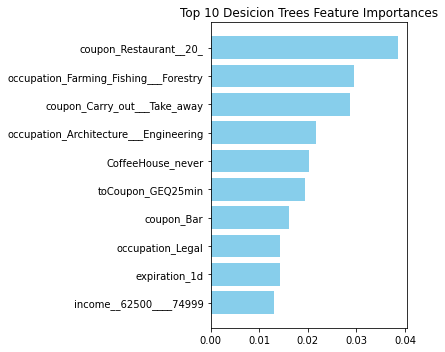

In [ ]:
# Importancia de variables
feature_names = X_test.columns#.tolist()
tree_feature_importances = model_xgb_opt.feature_importances_
sorted_idx = tree_feature_importances.argsort()

n_import = 10
y_ticks = np.arange(0, len(feature_names))[-n_import:]
fig, ax = plt.subplots(figsize = (6,5))
ax.barh(y_ticks[-n_import:], tree_feature_importances[sorted_idx][-n_import:], color = 'skyblue')
ax.set_yticklabels(feature_names[sorted_idx][-n_import:])
ax.set_yticks(y_ticks)
ax.set_title("Top 10 Desicion Trees Feature Importances")
fig.tight_layout()
plt.show()

In [ ]:
#!pip install shap
#https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/tree_based_models/Census%20income%20classification%20with%20XGBoost.html
# Explicando variables
import shap
import matplotlib.pylab as pl
# print the JS visualization code to the notebook
shap.initjs()

In [ ]:
#X.columns = X_train.columns
# Damos formato a la data.
X1 = X.merge(y, left_index = True, right_index = True, how = 'inner')
X1.rename(columns = {'Y':'target'}, inplace = True)
X1.head()

,has_children,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,destination_Home,destination_No_Urgent_Place,destination_Work,passanger_Alone,passanger_Friend_s_,...,RestaurantLessThan20_4_8,RestaurantLessThan20_gt8,RestaurantLessThan20_less1,RestaurantLessThan20_never,Restaurant20To50_1_3,Restaurant20To50_4_8,Restaurant20To50_gt8,Restaurant20To50_less1,Restaurant20To50_never,Y
0,1,0,0,0,1,0,1,0,1,0,...,1,0,0,0,1,0,0,0,0,1
1,1,0,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0
2,1,1,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,1
3,1,1,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,1,0,0,1,...,1,0,0,0,1,0,0,0,0,0


In [1]:
# this takes a minute or two since we are explaining over 30 thousand samples in a model with over a thousand trees
explainer = shap.TreeExplainer(model_xgb_opt)
shap_values = explainer.shap_values(X1)


NameError: ignored

In [ ]:
shap.summary_plot(shap_values[1], X1)

------------


## LightGBM

In [ ]:
from lightgbm import LGBMClassifier

In [ ]:
#Entrenamos el árbol de clasificación - Modelo base.
model_lgbm_base = LGBMClassifier()
model_lgbm_base.fit(X_train, y_train)

print('Exactitud del modelo inicial en entrenamiento:', model_lgbm_base.score(X_train, y_train))
print('Exactitud del modelo inicial en validación:', model_lgbm_base.score(X_test, y_test))
print()

print('AUC del modelo inicial en entrenamiento:', roc_auc_score(y_train, model_lgbm_base.predict_proba(X_train)[:,1]))
print('AUC del modelo inicial en validación:',roc_auc_score(y_test, model_lgbm_base.predict_proba(X_test)[:,1]))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


Exactitud del modelo inicial en entrenamiento: 0.8208337439637331
Exactitud del modelo inicial en validación: 0.7497043752463539

AUC del modelo inicial en entrenamiento: 0.9073176487896621
AUC del modelo inicial en validación: 0.8269757883203821


In [ ]:
# Rendimiento del modelo en data de entrenamiento
model_lgbm_base_ptrain = performance_model(X_train, y_train, model_lgbm_base)